In [1]:
# 경로설정
import sys
path = "C:\github/aide-analysis/"
sys.path.append(path)

import os
import sys
from pathlib import Path
sys.path.append(str(Path(os.getcwd())))

# 한글폰트
import os
import matplotlib.pyplot as plt
if os.name =='posix':
    plt.rc('font',family = 'ApplGothic')
else:
    plt.rc('font',family = 'Malgun Gothic')
    
# 경고출력문 제거
import warnings
warnings.filterwarnings("ignore")

# 모듈 import`
import pandas as pd
import src
from src.openapi import KakaoLocalAPI as kakao
from openpyxl import load_workbook
from src.utils import insert_dataframe_to_excel_sheet
from src.sql import DatabaseHandler
from src.temp import *
from datetime import datetime
import datetime
from dateutil.relativedelta import relativedelta
from src.bigquery import BigqueryHandler
import seaborn as sns
import numpy as np
import statistics
from tqdm import tqdm
import config
from core.config import Config
import json
from datetime import datetime
import geopandas as gpd
from tqdm import tqdm
import folium
from openpyxl import load_workbook
import openpyxl
import tqdm
config = Config()
BH = BigqueryHandler()


# DataFrame 디스플레이 설정
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)
pd.set_option('display.width', 100)

In [47]:
sql =f"""
SELECT *
FROM `aidepartners.aide.kb_weekly_trading_index`
WHERE sigunguCode LIKE '11%' AND date >'2022-01-01' 
"""
df =BH.read_table(sql)

In [48]:
df = df[df['regionName']!='전국 서울특별시'].reset_index(drop =True)

In [53]:
region_list = list(df['regionName'].unique())

In [74]:
df[(df['date']==df['date'].max())&(df['tradingIndex']==df['tradingIndex'].max())]

,sigunguCode,regionName,date,tradingIndex
139,11170,전국 서울특별시 강북 용산구,2022-08-22,102.679019


In [75]:
df[(df['date']==df['date'].max())&(df['tradingIndex']==df['tradingIndex'].min())]

,sigunguCode,regionName,date,tradingIndex
135,11290,전국 서울특별시 강북 성북구,2022-08-22,99.228428


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


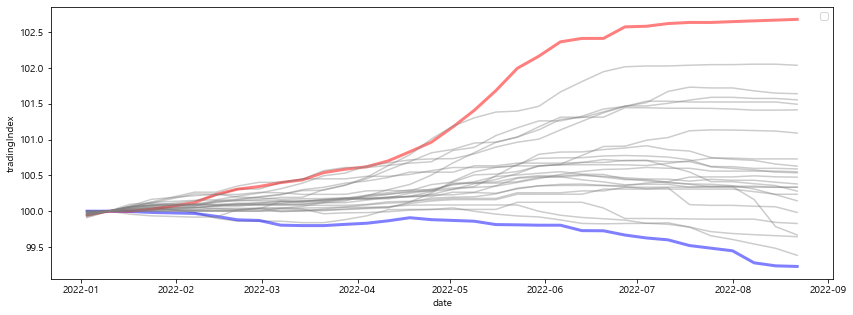

In [95]:
# 서울시 구별 매매가격지수 비교 
fig, ax = plt.subplots(figsize = (14, 5))
for i in region_list:
    test = df[df['regionName']==i]
    if i =='전국 서울특별시 강북 용산구':
        sns.lineplot(test['date'], test['tradingIndex'], legend = True, color = 'red',linewidth = 3,alpha = 0.5)
    elif i =='전국 서울특별시 강북 성북구':
        sns.lineplot(test['date'], test['tradingIndex'], legend = True, color = 'blue',linewidth = 3,alpha = 0.5)
    else:
        sns.lineplot(test['date'], test['tradingIndex'], legend = True, color = 'gray',alpha= 0.4)
plt.legend()

In [36]:
df_pivot = df.pivot_table(index = 'date', columns = 'regionName',values = 'tradingIndex')
df_pivot

regionName,전국 서울특별시 강남 강남구,전국 서울특별시 강남 강동구,전국 서울특별시 강남 강서구,전국 서울특별시 강남 관악구,전국 서울특별시 강남 구로구,전국 서울특별시 강남 금천구,전국 서울특별시 강남 동작구,전국 서울특별시 강남 서초구,전국 서울특별시 강남 송파구,전국 서울특별시 강남 양천구,전국 서울특별시 강남 영등포구,전국 서울특별시 강북 강북구,전국 서울특별시 강북 광진구,전국 서울특별시 강북 노원구,전국 서울특별시 강북 도봉구,전국 서울특별시 강북 동대문구,전국 서울특별시 강북 마포구,전국 서울특별시 강북 서대문구,전국 서울특별시 강북 성동구,전국 서울특별시 강북 성북구,전국 서울특별시 강북 용산구,전국 서울특별시 강북 은평구,전국 서울특별시 강북 종로구,전국 서울특별시 강북 중구,전국 서울특별시 강북 중랑구
date,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-03,99.972328,99.966935,99.922068,99.967608,99.976663,99.942101,99.943879,99.956087,99.945525,99.954042,99.978333,99.910893,99.968642,100.003018,100.000038,99.936106,99.939007,99.986137,99.959347,100.000000,99.947888,100.001414,100.000000,99.999985,99.980944
2022-01-10,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-01-17,100.060602,100.066963,100.037944,99.958901,100.041637,100.053171,100.020733,100.030426,100.000333,100.096677,100.071629,100.061351,100.004089,100.014543,100.055258,100.040052,99.999991,100.028922,100.066525,99.996012,100.000013,100.014361,100.000000,100.000000,100.056346
2022-01-24,100.122203,100.105737,100.086343,99.934851,100.041665,100.129079,100.020653,100.057239,100.017932,100.113883,100.166114,100.073628,100.033515,100.050336,100.091573,100.061371,100.018529,100.028973,100.079336,99.982675,100.027066,100.014357,100.000000,100.000000,100.081641
2022-02-07,100.151588,100.097999,100.091853,99.917185,100.051494,100.265675,100.020653,100.097818,100.047797,100.241038,100.216947,100.073678,100.070188,100.050919,100.092598,99.981424,100.047149,100.010405,100.143362,99.968673,100.119360,100.014357,100.000000,100.000000,100.081617
2022-02-14,100.159437,100.092008,100.125912,99.919239,100.071182,100.265579,100.041001,100.149044,100.078694,100.238791,100.234020,100.143210,100.126111,100.036498,100.092661,99.901062,100.070659,100.010415,100.219307,99.928688,100.234406,100.014357,100.000000,100.000000,100.081617
2022-02-21,100.208929,100.112138,100.159906,100.021383,100.071161,100.351278,100.041035,100.169640,100.091572,100.198259,100.234039,100.147638,100.148851,100.023408,100.092661,99.860570,100.103147,100.010415,100.309053,99.879536,100.307973,100.017535,100.000000,100.000000,100.081617
2022-02-28,100.253548,100.092618,100.193865,100.034804,100.099104,100.403572,100.041035,100.202374,100.094270,100.184293,100.262088,100.147584,100.161027,100.043306,100.111145,99.860631,100.122241,100.039527,100.308997,99.870996,100.344602,100.017493,100.000000,100.000000,100.081617
2022-03-07,100.313101,100.108335,100.229682,100.135149,100.099109,100.403521,100.042472,100.234697,100.094234,100.166525,100.257327,100.147584,100.193059,100.043283,100.141467,99.860631,100.130664,99.992229,100.398807,99.804926,100.399613,100.017493,100.040124,100.000000,100.081617


- 어떻게 하면 지역간의 상승 혹은 하락시 어떤 구가 먼저 변화가 있고 어떤구가 뒤이어 따라오는지 알수있을까?
- 이런것을 민감도라고 부를 수 있나?
- 그렇다면 민감도를 구할 수 있나?

<AxesSubplot:xlabel='regionName', ylabel='regionName'>

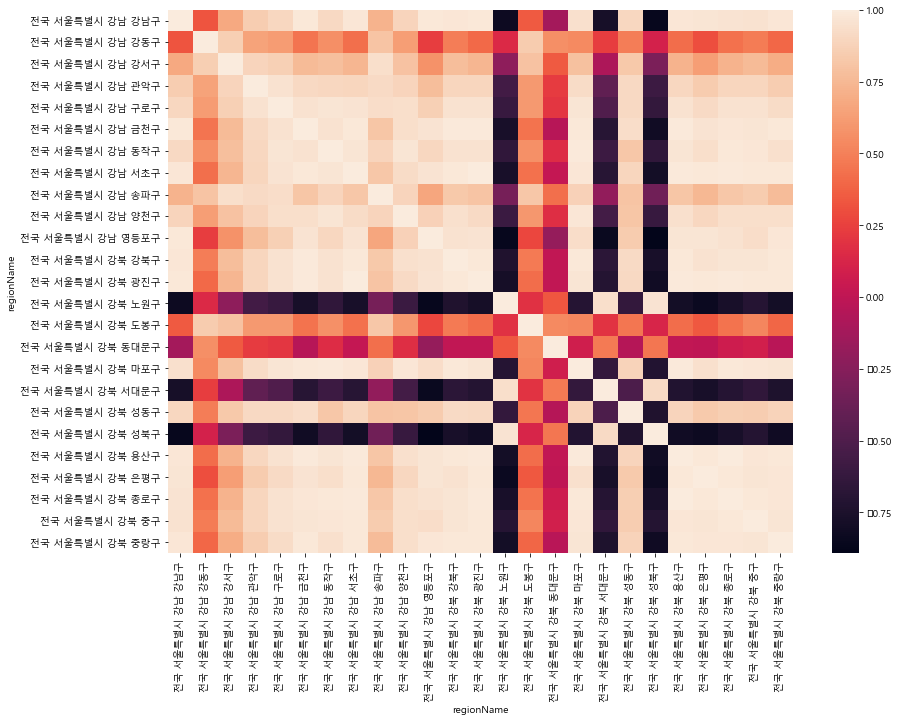

In [99]:
fig, ax = plt.subplots(figsize = (14,10))
sns.heatmap(df_pivot.corr())